In [160]:
import pandas as pd

In [161]:
df = pd.read_csv('Terry_cleaned.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Subject_ID,GO_/_SC_Num,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,...,Beat,Arrested,Weapon_Found,Subject_Age_Group,Officer_Race,Subject_Perceived_Race,Officer_Age,Year,Month,Officer_Age_Group
0,0,1,-1,20150000130727,80117,Arrest,None,7557,1985,1,...,L3,1.0,0.0,36 - 45,White,Other,30,2015,9,30-39
1,1,2,-1,20150000405361,102566,Field Contact,None,6954,1974,1,...,G3,0.0,0.0,36 - 45,Asian,Multi-Racial,41,2015,11,40-49
2,2,3,-1,20140000120677,92317,Arrest,None,7500,1984,1,...,O2,1.0,0.0,36 - 45,Black or African American,Asian,31,2015,10,30-39
3,3,16,-1,20150000004043,70892,Field Contact,None,7582,1966,1,...,G2,0.0,0.0,26 - 35,Hispanic or Latino,Multi-Racial,49,2015,8,40-49
4,4,19,-1,20150000004385,76734,Field Contact,None,6759,1970,1,...,N2,0.0,0.0,18 - 25,Black or African American,Native Hawaiian or Other Pacific Islander,45,2015,8,40-49


In [163]:
df['Precinct'].value_counts()

West         11647
North        11430
East          6596
South         6119
SouthWest     3834
OTHER         1231
Name: Precinct, dtype: int64

In [164]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Subject_ID', 'GO_/_SC_Num',
       'Terry_Stop_ID', 'Stop_Resolution', 'Weapon_Type', 'Officer_ID',
       'Officer_YOB', 'Officer_Gender', 'Subject_Perceived_Gender',
       'Reported_Date', 'Reported_Time', 'Initial_Call_Type',
       'Final_Call_Type', 'Call_Type', 'Officer_Squad', 'Arrest_Flag',
       'Frisk_Flag', 'Precinct', 'Sector', 'Beat', 'Arrested', 'Weapon_Found',
       'Subject_Age_Group', 'Officer_Race', 'Subject_Perceived_Race',
       'Officer_Age', 'Year', 'Month', 'Officer_Age_Group'],
      dtype='object')

To begin with, we will look to drop the columns that we do not think is relevant to our model. This would be the following - 

'Unnamed: 0', 

'Unnamed: 0.1',

'Subject_ID', 

'GO_/_SC_Num',

'Terry_Stop_ID', 

'Stop_Resolution', 

'Weapon_Type',

'Officer_ID',

'Officer_YOB',

'Reported_Date'

'Initial_Call_Type',

'Final_Call_Type',

'Call_Type', 

'Officer_Squad', 

'Arrest_Flag',

'Sector',

'Beat', 

'Officer_Age'

In [165]:
df.drop(['Unnamed: 0', 
'Unnamed: 0.1',
'Subject_ID', 
'GO_/_SC_Num',
'Terry_Stop_ID', 
'Stop_Resolution', 
'Weapon_Found',
'Officer_ID',
'Officer_YOB',
'Reported_Date',
'Initial_Call_Type',
'Final_Call_Type',
'Call_Type', 
'Officer_Squad', 
'Arrest_Flag',
'Sector',
'Beat', 
'Officer_Age'], axis=1,inplace=True)

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
df.columns

Index(['Weapon_Type', 'Officer_Gender', 'Subject_Perceived_Gender',
       'Reported_Time', 'Frisk_Flag', 'Precinct', 'Arrested',
       'Subject_Age_Group', 'Officer_Race', 'Subject_Perceived_Race', 'Year',
       'Month', 'Officer_Age_Group'],
      dtype='object')

In [167]:
X = df.drop(columns='Arrested')

In [168]:
y = df['Arrested']

In [169]:
X.head()

,Weapon_Type,Officer_Gender,Subject_Perceived_Gender,Reported_Time,Frisk_Flag,Precinct,Subject_Age_Group,Officer_Race,Subject_Perceived_Race,Year,Month,Officer_Age_Group
0,None,1,1,15:34:00,0,North,36 - 45,White,Other,2015,9,30-39
1,None,1,1,00:49:00,1,East,36 - 45,Asian,Multi-Racial,2015,11,40-49
2,None,1,1,11:32:00,0,South,36 - 45,Black or African American,Asian,2015,10,30-39
3,None,1,0,09:08:00,0,East,26 - 35,Hispanic or Latino,Multi-Racial,2015,8,40-49
4,None,1,1,07:05:00,0,North,18 - 25,Black or African American,Native Hawaiian or Other Pacific Islander,2015,8,40-49


In [170]:
X.columns

Index(['Weapon_Type', 'Officer_Gender', 'Subject_Perceived_Gender',
       'Reported_Time', 'Frisk_Flag', 'Precinct', 'Subject_Age_Group',
       'Officer_Race', 'Subject_Perceived_Race', 'Year', 'Month',
       'Officer_Age_Group'],
      dtype='object')

# One Hot Encoding Categorical Variables

This section will look at creating dummy columns for our categorical data. We will be using One Hot Encoding from the sklearn libary in order to perform this.

In [171]:
for x in list(X.columns):
    print(f'{x} : \n{X[x].value_counts()}\n' )

Weapon_Type : 
None                   38567
Stabbing Instrument     1769
Firearm                  414
Other                    107
Name: Weapon_Type, dtype: int64

Officer_Gender : 
1    36300
0     4557
Name: Officer_Gender, dtype: int64

Subject_Perceived_Gender : 
1    32424
0     8433
Name: Subject_Perceived_Gender, dtype: int64

Reported_Time : 
19:18:00    51
03:13:00    50
03:09:00    50
02:56:00    50
19:02:00    49
            ..
17:24:29     1
17:25:48     1
00:59:12     1
10:47:14     1
18:50:15     1
Name: Reported_Time, Length: 7432, dtype: int64

Frisk_Flag : 
0    31891
1     8966
Name: Frisk_Flag, dtype: int64

Precinct : 
West         11647
North        11430
East          6596
South         6119
SouthWest     3834
OTHER         1231
Name: Precinct, dtype: int64

Subject_Age_Group : 
26 - 35         13966
36 - 45          9241
18 - 25          8560
46 - 55          5235
56 and Above     1973
1 - 17           1882
Name: Subject_Age_Group, dtype: int64

Officer_Race : 
W

In [106]:
from sklearn.preprocessing import OneHotEncoder

#### Columns which need to be One Hot Encoded:

'Precinct',

'Subject_Age_Group', 

'Officer_Race',

'Subject_Perceived_Race',

'Officer_Age_Group'

'Weapon_Type'

In [172]:
X_to_ohe = X[['Precinct',
'Subject_Age_Group', 
'Officer_Race',
'Subject_Perceived_Race',
'Officer_Age_Group',
'Weapon_Type']]

In [173]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X_to_ohe)

In [174]:
columns = ohe.get_feature_names(input_features=X_to_ohe.columns)
X_ohe_df = pd.DataFrame(X_ohe.todense(), columns=columns)

In [175]:
X_ohe_df.head()

,Precinct_East,Precinct_North,Precinct_OTHER,Precinct_South,Precinct_SouthWest,Precinct_West,Subject_Age_Group_1 - 17,Subject_Age_Group_18 - 25,Subject_Age_Group_26 - 35,Subject_Age_Group_36 - 45,...,Subject_Perceived_Race_White,Officer_Age_Group_20-29,Officer_Age_Group_30-39,Officer_Age_Group_40-49,Officer_Age_Group_50-59,Officer_Age_Group_60+,Weapon_Type_Firearm,Weapon_Type_None,Weapon_Type_Other,Weapon_Type_Stabbing Instrument
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [176]:
X_ohe_df.columns

Index(['Precinct_East', 'Precinct_North', 'Precinct_OTHER', 'Precinct_South',
       'Precinct_SouthWest', 'Precinct_West', 'Subject_Age_Group_1 - 17',
       'Subject_Age_Group_18 - 25', 'Subject_Age_Group_26 - 35',
       'Subject_Age_Group_36 - 45', 'Subject_Age_Group_46 - 55',
       'Subject_Age_Group_56 and Above',
       'Officer_Race_American Indian/Alaska Native', 'Officer_Race_Asian',
       'Officer_Race_Black or African American',
       'Officer_Race_Hispanic or Latino',
       'Officer_Race_Nat Hawaiian/Oth Pac Islander',
       'Officer_Race_Two or More Races', 'Officer_Race_White',
       'Subject_Perceived_Race_American Indian or Alaska Native',
       'Subject_Perceived_Race_Asian',
       'Subject_Perceived_Race_Black or African American',
       'Subject_Perceived_Race_Hispanic',
       'Subject_Perceived_Race_Multi-Racial',
       'Subject_Perceived_Race_Native Hawaiian or Other Pacific Islander',
       'Subject_Perceived_Race_Other', 'Subject_Perceived_Race_White

We will now drop 1 column from each of the columns from the resulting one hot encoding to prevent multicolinearity between the columns, We will drop the following:

'Precinct_OTHER',

'Subject_Age_Group_1 - 17',

'Officer_Race_American Indian/Alaska Native',

'Subject_Perceived_Race_American Indian or Alaska Native',

'Officer_Age_Group_60+'

In [178]:
X_ohe_df.drop(columns=['Precinct_OTHER',
'Subject_Age_Group_1 - 17',
'Officer_Race_American Indian/Alaska Native',
'Subject_Perceived_Race_American Indian or Alaska Native',
'Officer_Age_Group_60+','Weapon_Type_Other'] ,axis=1, inplace=True)

In [179]:
X_all = pd.concat([pd.DataFrame(X), X_ohe_df], axis=1)

In [180]:
X_all.columns

Index(['Weapon_Type', 'Officer_Gender', 'Subject_Perceived_Gender',
       'Reported_Time', 'Frisk_Flag', 'Precinct', 'Subject_Age_Group',
       'Officer_Race', 'Subject_Perceived_Race', 'Year', 'Month',
       'Officer_Age_Group', 'Precinct_East', 'Precinct_North',
       'Precinct_South', 'Precinct_SouthWest', 'Precinct_West',
       'Subject_Age_Group_18 - 25', 'Subject_Age_Group_26 - 35',
       'Subject_Age_Group_36 - 45', 'Subject_Age_Group_46 - 55',
       'Subject_Age_Group_56 and Above', 'Officer_Race_Asian',
       'Officer_Race_Black or African American',
       'Officer_Race_Hispanic or Latino',
       'Officer_Race_Nat Hawaiian/Oth Pac Islander',
       'Officer_Race_Two or More Races', 'Officer_Race_White',
       'Subject_Perceived_Race_Asian',
       'Subject_Perceived_Race_Black or African American',
       'Subject_Perceived_Race_Hispanic',
       'Subject_Perceived_Race_Multi-Racial',
       'Subject_Perceived_Race_Native Hawaiian or Other Pacific Islander',
       

In [181]:
X_all.drop(columns=['Precinct','Subject_Age_Group', 'Officer_Race','Subject_Perceived_Race','Officer_Age_Group','Weapon_Type'],axis=1, inplace= True)

In [182]:
type(X_all)

pandas.core.frame.DataFrame

In [183]:
X_all.columns

Index(['Officer_Gender', 'Subject_Perceived_Gender', 'Reported_Time',
       'Frisk_Flag', 'Year', 'Month', 'Precinct_East', 'Precinct_North',
       'Precinct_South', 'Precinct_SouthWest', 'Precinct_West',
       'Subject_Age_Group_18 - 25', 'Subject_Age_Group_26 - 35',
       'Subject_Age_Group_36 - 45', 'Subject_Age_Group_46 - 55',
       'Subject_Age_Group_56 and Above', 'Officer_Race_Asian',
       'Officer_Race_Black or African American',
       'Officer_Race_Hispanic or Latino',
       'Officer_Race_Nat Hawaiian/Oth Pac Islander',
       'Officer_Race_Two or More Races', 'Officer_Race_White',
       'Subject_Perceived_Race_Asian',
       'Subject_Perceived_Race_Black or African American',
       'Subject_Perceived_Race_Hispanic',
       'Subject_Perceived_Race_Multi-Racial',
       'Subject_Perceived_Race_Native Hawaiian or Other Pacific Islander',
       'Subject_Perceived_Race_Other', 'Subject_Perceived_Race_White',
       'Officer_Age_Group_20-29', 'Officer_Age_Group_30-39',


## Train Test Validation Split

In this section we will split our X and y data sets into training, test and validation sets.

In [228]:
from sklearn.model_selection import train_test_split

### Train Test

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe_df,y, test_size=0.25)

### Train Val Split

In [186]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25)

In [227]:
print('Shapes of Each Set')
print('-------------------')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Shapes of Each Set
-------------------
X_train: (22981, 30)
y_train: (22981,)
X_val: (7661, 30)
y_val: (7661,)
X_test: (10215, 30)
y_test: (10215,)


# Baseline Model

In this section, we will develop our baseline model using the data splits we had conducted previously. For our baseline model, we will be using a Logistic Regression. Once the model has been fit, we will conduct a few diagnostic tests to see how our model is performing. Namely Accuracy and AUC.

## Logisitic Regression

We will fit our model using the Logistic Regression learner over here

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score

In [223]:
logreg = LogisticRegression(penalty='none', solver='lbfgs')
model1_log = logreg.fit(X_train, y_train)
model1_log

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that we have fit our model, we will create a predicted y variable using the predict function on the validation dataset.

In [318]:
y_val_pred = model_log.predict(X_val)

In [319]:
print("Accuracy of model (val) =", accuracy_score(y_val, y_val_pred))

Accuracy of model (val) = 0.7599530087455946


In [320]:
y_val_predproba = model_log.predict_proba(X_val)

In [322]:
print("ROC_AUC of model (val) =", roc_auc_score(y_val, y_val_predproba[:,1]))

ROC_AUC of model (val) = 0.6232840503223773


We will do the same for the test dataset.

In [225]:
y_test_pred = model_log.predict(X_test)

print("Accuracy of model (test) =", accuracy_score(y_test, y_test_pred))
print("ROC_AUC of model (test) =", roc_auc_score(y_test, y_test_pred))

Accuracy of model (test) = 0.7567302985805189
ROC_AUC of model (test) = 0.5076315625556336


In [387]:
intercept = model_log.intercept_
print("Intercept =", intercept)

coefs = model_log.coef_[0]
cols = list(X_all.columns)
dict = {cols[i]: coefs[i] for i in range(len(coefs))}
dict

Intercept = [-4.10442568]


{'Officer_Gender': 2.798109074783362,
 'Subject_Perceived_Gender': 2.4614307637717885,
 'Reported_Time': 2.7252351640250323,
 'Frisk_Flag': 2.387987001083063,
 'Year': 2.7973039978080516,
 'Month': 0.16155267487229044,
 'Precinct_East': 0.31168010544334307,
 'Precinct_North': 0.2122575299512902,
 'Precinct_South': 0.01774379790192246,
 'Precinct_SouthWest': 0.050626662829534076,
 'Precinct_West': 0.1718797019686332,
 'Subject_Age_Group_18 - 25': -0.039864107158641214,
 'Subject_Age_Group_26 - 35': 0.13041051476762597,
 'Subject_Age_Group_36 - 45': 0.10121748479150904,
 'Subject_Age_Group_46 - 55': 0.2025131794597132,
 'Subject_Age_Group_56 and Above': 0.24928076779333214,
 'Officer_Race_Asian': 0.04775173101429184,
 'Officer_Race_Black or African American': -0.0996672219724735,
 'Officer_Race_Hispanic or Latino': -0.2618186972491533,
 'Officer_Race_Nat Hawaiian/Oth Pac Islander': -0.3269835902225263,
 'Officer_Race_Two or More Races': -0.5787459515541458,
 'Officer_Race_White': -0.7249

In [237]:
from sklearn.model_selaection import GridSearchCV, StratifiedKFold

In [252]:
skf = StratifiedKFold(n_splits = 5)

param_grid = {'penalty' : ['l1', 'l2','elasticnet'],
              'dual' : [True, False],
              'C' : [10,100,1000,10000],
              'class_weight' :['balanced'],
              'max_iter' : [10000]
              }

opt_model = GridSearchCV(model1_log,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model.fit(X_train,y_train)

pd.DataFrame(opt_model.cv_results_)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_select

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_dual,param_max_iter,param_penalty,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019216,0.022549,0.000000,0.000000,10,balanced,True,10000,l1,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.022992,0.025777,0.000000,0.000000,10,balanced,True,10000,l2,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.002671,0.001433,0.000000,0.000000,10,balanced,True,10000,elasticnet,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.004764,0.002617,0.000000,0.000000,10,balanced,False,10000,l1,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.387696,0.126769,0.006953,0.004626,10,balanced,False,10000,l2,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,0.615921,0.007010,1,0.623336,0.620992,0.617986,0.621985,0.623033,0.621466,0.001927
5,0.002470,0.000798,0.000000,0.000000,10,balanced,False,10000,elasticnet,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.002454,0.000448,0.000000,0.000000,100,balanced,True,10000,l1,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.002197,0.000370,0.000000,0.000000,100,balanced,True,10000,l2,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.002050,0.000306,0.000000,0.000000,100,balanced,True,10000,elasticnet,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.003017,0.001328,0.000000,0.000000,100,balanced,False,10000,l1,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
print(f'best model:{opt_model.best_params_}')
print(f'best score: {opt_model.best_score_}')

best model:{'C': 10, 'class_weight': 'balanced', 'dual': False, 'max_iter': 10000, 'penalty': 'l2'}
best score: 0.615921365778484


In [426]:
tuned_model = opt_model.best_estimator_

In [427]:
tuned_yval_pred = best_model.predict(X_val)

In [428]:
print("Accuracy of model (val) =", accuracy_score(y_val, tuned_yval_pred))

Accuracy of model (val) = 0.5712048035504503


In [429]:
tuned_yval_predproba = best_model.predict_proba(X_val)

In [430]:
print("ROC_AUC of model (val) =", roc_auc_score(y_val, tuned_yval_predproba[:,1]))

ROC_AUC of model (val) = 0.6234131769312978


In [431]:
tuned_coefs = tuned_model.coef_[0]
tuned_cols = list(X_all.columns)
tuned_dict = {tuned_cols[i]: tuned_coefs[i] for i in range(len(tuned_coefs))}
tuned_dict

{'Officer_Gender': 2.746348511351904,
 'Subject_Perceived_Gender': 2.405995727475379,
 'Reported_Time': 2.6709451403675826,
 'Frisk_Flag': 2.334902685472593,
 'Year': 2.7432996372422567,
 'Month': 0.17322048111487415,
 'Precinct_East': 0.3209054393548742,
 'Precinct_North': 0.2259983320536022,
 'Precinct_South': 0.02526118438314947,
 'Precinct_SouthWest': 0.05426536347641426,
 'Precinct_West': 0.17173395338936226,
 'Subject_Age_Group_18 - 25': -0.043923993582415416,
 'Subject_Age_Group_26 - 35': 0.12588915833594413,
 'Subject_Age_Group_36 - 45': 0.07857809234471198,
 'Subject_Age_Group_46 - 55': 0.20287290304543482,
 'Subject_Age_Group_56 and Above': 0.2381650702570174,
 'Officer_Race_Asian': 0.038848666671458795,
 'Officer_Race_Black or African American': -0.10642723135368426,
 'Officer_Race_Hispanic or Latino': -0.2671916780632092,
 'Officer_Race_Nat Hawaiian/Oth Pac Islander': -0.32036294243611513,
 'Officer_Race_Two or More Races': -0.5793642895025741,
 'Officer_Race_White': -0.724

## Confusion Matrix

In [412]:
#Prevalence = 3.6%
#https://datacollaborativeforjustice.org/wp-content/uploads/2018/10/Trends_in_Misdemeanors_Seattle.pdf

In [432]:
tuned_ytest_pred = best_model.predict(X_test)

In [433]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

In [434]:
conf_matrix(y_test, tuned_ytest_pred)

{'TP': 1515, 'TN': 4212, 'FP': 3556, 'FN': 932}

In [435]:
cnf_matrix = confusion_matrix(y_test, tuned_ytest_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[4212 3556]
 [ 932 1515]]


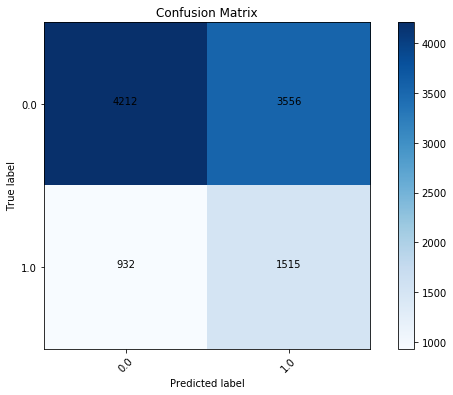

In [436]:
plt.figure(figsize=(10,6))
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cnf_matrix.max() 

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')


plt.colorbar()
plt.show()

True Positive: 1515 Predicted Yes, Actual Yes

True Negative: 4212 Predicted No, Actual No

False Positive: 3556 Predicted Yes, Actual No (Type 1 error)

False Negative: 932 Predicted No, Actual Yes (Type 2 error)


In [437]:
print(f' Test Accuracy: {accuracy_score(y_test, tuned_ytest_pred)}')
print(f' Test ROC- AUC Score: {roc_auc_score(y_test,tuned_ytest_pred)}')

 Test Accuracy: 0.5606461086637298
 Test ROC- AUC Score: 0.5806749852801114


## SMOTE

In [246]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [248]:
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 

In [249]:
model2_log = logreg.fit(X_train_resampled, y_train_resampled)

In [254]:
skf = StratifiedKFold(n_splits = 5)

param_grid = {'penalty' : ['l1', 'l2','elasticnet'],
              'dual' : [True, False],
              'C' : [10,100,1000,10000],
              'class_weight' :['balanced'],
              'max_iter' : [10000]
              }

opt_model2 = GridSearchCV(model2_log,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model2.fit(X_train_resampled,y_train_resampled)

pd.DataFrame(opt_model2.cv_results_)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_dual,param_max_iter,param_penalty,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036908,0.024017,0.000000,0.000000,10,balanced,True,10000,l1,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.708879,0.075698,0.004318,0.000859,10,balanced,True,10000,l2,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,0.622965,0.007864,11,0.627167,0.625619,0.621679,0.624308,0.627082,0.625171,0.002038
2,0.002086,0.000165,0.000000,0.000000,10,balanced,True,10000,elasticnet,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.208206,0.376813,0.004911,0.001415,10,balanced,False,10000,l1,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,0.622997,0.007875,2,0.627150,0.625642,0.621696,0.624300,0.627105,0.625179,0.002035
4,0.327451,0.145656,0.010985,0.005837,10,balanced,False,10000,l2,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,0.622976,0.007878,10,0.627164,0.625620,0.621685,0.624307,0.627083,0.625172,0.002036
5,0.009775,0.007413,0.000000,0.000000,10,balanced,False,10000,elasticnet,"{'C': 10, 'class_weight': 'balanced', 'dual': ...",...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.055500,0.039193,0.000000,0.000000,100,balanced,True,10000,l1,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.042251,0.930234,0.006349,0.003524,100,balanced,True,10000,l2,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,0.622984,0.007873,8,0.627130,0.625631,0.621701,0.624329,0.627101,0.625178,0.002026
8,0.003458,0.000397,0.000000,0.000000,100,balanced,True,10000,elasticnet,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.829475,0.199118,0.007847,0.001809,100,balanced,False,10000,l1,"{'C': 100, 'class_weight': 'balanced', 'dual':...",...,0.622986,0.007873,6,0.627138,0.625626,0.621697,0.624321,0.627100,0.625176,0.002029


In [391]:
print(f'best model:{opt_model2.best_params_}')
print(f'best score: {opt_model2.best_score_}')

best model:{'C': 1000, 'class_weight': 'balanced', 'dual': True, 'max_iter': 10000, 'penalty': 'l2'}
best score: 0.6230013895514614


In [200]:
y_train.value_counts(normalize=True)

0.0    0.755363
1.0    0.244637
Name: Arrested, dtype: float64

In [392]:

C_param_range = [10, 100,1000, 1000000]
names = [10, 100,1000, 1000000]


for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log2 = logreg.fit(X_train, y_train)
    print(model_log2) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 10: 0.6102400499234649
-------------------------------------------------------
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 100: 0.6102627242336714
-------------------------------------------------------
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                

In [ ]:
penalty={‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
    dual=False, True
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,

In [204]:
from sklearn.metrics import confusion_matrix

In [211]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression( solver='saga', penalty='l1')
lasso_log = logreg.fit(X_train, y_train)
lasso_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
lasso_log.score(X_train, y_train)

0.755928810756712

In [213]:
lasso_log.score(X_test, y_test)

0.7565345080763582

In [214]:
y_val_pred_L1 = lasso_log.predict(X_val)

print("Accuracy of model =", accuracy_score(y_val, y_val_pred_L1))

print("ROC_AUC of model =", roc_auc_score(y_val, y_val_pred_L1))

Accuracy of model = 0.7598224774833573
ROC_AUC of model = 0.512860057215608


In [215]:

intercept = lasso_log.intercept_
print("Intercept =", intercept)

coefs = lasso_log.coef_
cols = list(X.columns)
print("Coefficients =", coefs)
print(cols)

Intercept = [-3.37622359]
Coefficients = [[ 2.51016260e+00  2.17395985e+00  2.43750342e+00  2.09784267e+00
   2.51145188e+00  1.39909641e-01  2.90408175e-01  1.90434832e-01
  -3.67971545e-04  2.47533638e-02  6.70672588e-02 -1.27016272e-01
   3.00601719e-02  0.00000000e+00  1.03110579e-01  1.55426655e-01
   8.08000890e-02 -5.96256476e-02 -2.17317035e-01 -2.78473083e-01
  -5.17626514e-01 -6.76082729e-01 -2.35761235e-01  6.93167398e-01
   5.44878956e-01  3.55477386e-01  1.65547908e-01  1.68982662e-01
  -8.04703277e-01  1.69334948e-01]]
['Weapon_Type', 'Officer_Gender', 'Subject_Perceived_Gender', 'Reported_Time', 'Frisk_Flag', 'Precinct', 'Subject_Age_Group', 'Officer_Race', 'Subject_Perceived_Race', 'Year', 'Month', 'Officer_Age_Group']


# K-Nearest Neighbours

In [270]:
from sklearn.neighbors import KNeighborsClassifier

In [271]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [272]:
KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)

NameError: name 'kwargs' is not defined

In [273]:
test_preds = clf.predict(X_train)

In [274]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [275]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_train, test_preds)

Precision Score: 0.45287698412698413
Recall Score: 0.1623977232301672
Accuracy Score: 0.7470954266568034
F1 Score: 0.2390678188007332


In [276]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [277]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
F1-Score: 0.26666666666666666


# Decision Trees

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

In [262]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [263]:
  criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,

IndentationError: unexpected indent (<ipython-input-263-0a41684a4dfd>, line 2)

In [264]:
y_dt_pred = classifier.predict(X_test) 

In [265]:
acc = accuracy_score(y_test,y_dt_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dt_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_dt_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :74.82134116495351

AUC is :0.51

Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,7481,287,7768
1.0,2285,162,2447
All,9766,449,10215


In [280]:
classifier.feature_importances_

array([0.03137384, 0.01723865, 0.03359541, 0.02921679, 0.01763146,
       0.05050578, 0.0563482 , 0.05133535, 0.0397546 , 0.03155566,
       0.031867  , 0.02798163, 0.02674013, 0.01014512, 0.02735779,
       0.04805716, 0.03036308, 0.03943524, 0.03603916, 0.02367809,
       0.01416497, 0.02647006, 0.04970648, 0.03777424, 0.04523947,
       0.03080573, 0.0293313 , 0.01022536, 0.08095547, 0.01510677])

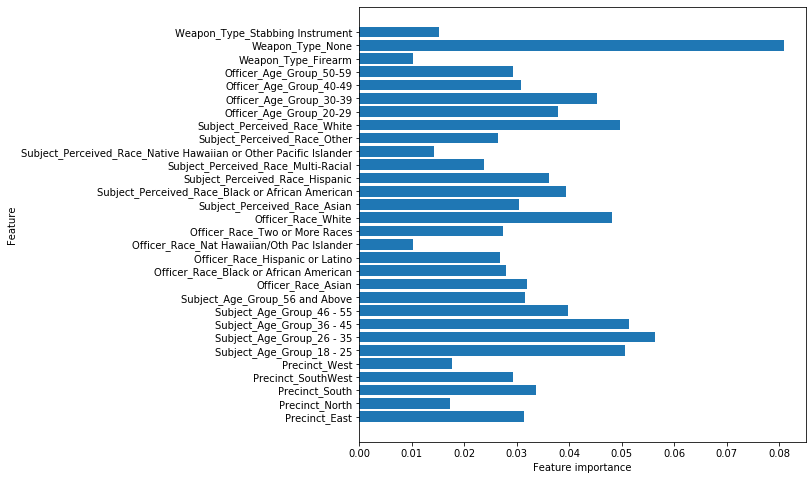

In [281]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(classifier)

In [266]:
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [267]:
y_dt2_pred = classifier_2.predict(X_test) 

In [269]:
acc = accuracy_score(y_test,y_dt2_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dt2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_dt2_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :74.6059716103769

AUC is :0.51

Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,7458,310,7768
1.0,2284,163,2447
All,9742,473,10215


In [283]:
classifier_2.feature_importances_

array([0.04073386, 0.01941815, 0.0670433 , 0.0185288 , 0.06466682,
       0.04086394, 0.03445837, 0.05435525, 0.04883397, 0.03141432,
       0.02860003, 0.02638369, 0.02697766, 0.01304843, 0.02731722,
       0.03452887, 0.02919297, 0.03163001, 0.03285673, 0.02922138,
       0.01403266, 0.02150038, 0.03545345, 0.04188513, 0.04269601,
       0.03137389, 0.02586889, 0.00763151, 0.06285632, 0.01662801])

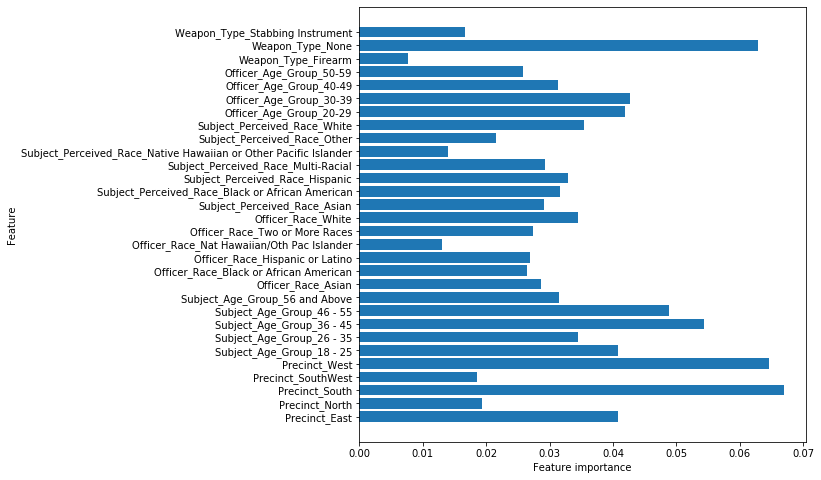

In [284]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(classifier_2)

# Decision Tree Regressor

In [278]:
from sklearn.tree import DecisionTreeRegressor  

# Instantiate and fit a regression tree model to training data 
regressor = DecisionTreeRegressor(random_state=42)  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [279]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred_DTR = regressor.predict(X_test) 

# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_DTR))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_DTR))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_DTR)))

Mean Absolute Error: 0.34826327923908035
Mean Squared Error: 0.19597135166973603
Root Mean Squared Error: 0.4426865162501971


# Bagging

In [286]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [292]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [293]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [294]:
bagged_tree.score(X_train, y_train)

0.757756407467038

In [295]:
bagged_tree.score(X_test, y_test)

0.7610376896720509

# Random Forest

In [288]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [289]:
forest.score(X_train, y_train)

0.7554066402680475

In [290]:
forest.score(X_test, y_test)

0.7604503181595693

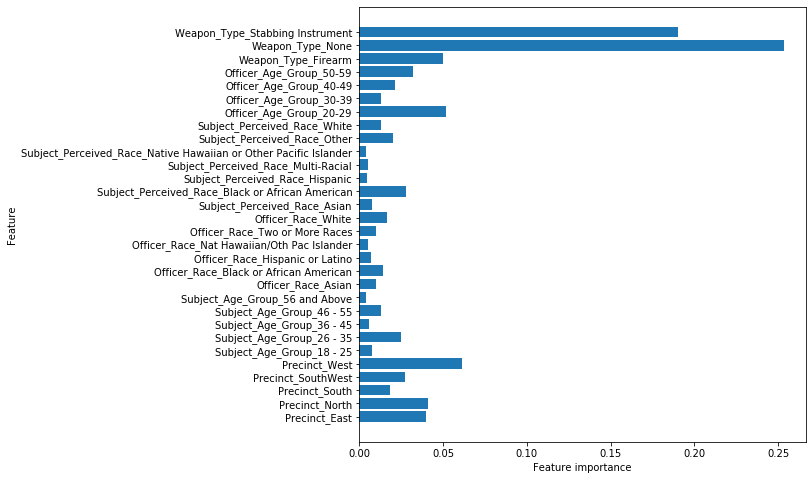

In [291]:
plot_feature_importances(forest)